### Logistic Regression 

Linear function: $y = b_0 +b_1 * x$

Sigmoid function: $p = \dfrac{1}{1+e^{-y}}$

Logistic regression formula: $\ln(\dfrac{p}{1-p}) = b_0 +b_1 * x $ 

or $y = \dfrac{1}{1+e^{-b_0-b_1*x}} $

Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost.

### Importing the libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

### Review data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


### Split data into the independent vs dependent variables

In [17]:
X = df.iloc[:,[2,3]].values
y = df.iloc[:,-1].values

### Split data into train and test sets

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 0)

### Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc_X = StandardScaler()

In [28]:
X_train = sc_X.fit_transform(X_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [29]:
X_test = sc_X.fit_transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Fitting Logistic Regression Model to train dataset

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
classifier = LogisticRegression(random_state = 0)

In [32]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predicting the Test set results

In [33]:
y_pred =  classifier.predict(X_test)

### Making the confusion matrix

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
cm = confusion_matrix(y_test,y_pred)

In [36]:
cm

array([[63,  5],
       [ 7, 25]])

|  Predicted \Actual Values| 1 | 0 |
| --- | --- | --- |
| 1 | TP =63 | FP =5 |
| 0 | FN = 7 | TN = 25 |


### Visualising the  Training set results

In [37]:
from matplotlib.colors import ListedColormap

In [38]:
X_set, y_set = X_train, y_train

In [39]:
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step = 0.01),\
                        np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step = 0.01))

(-2.5825424477554764, 3.3274575522443977)

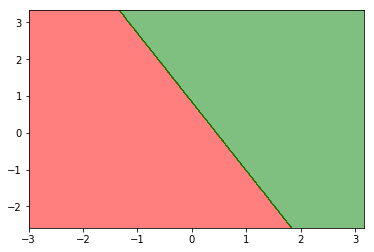

In [45]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()] ).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

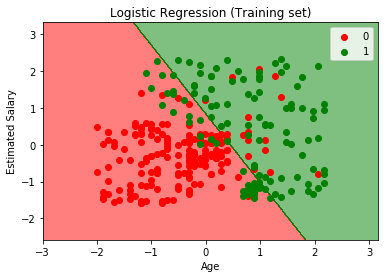

In [43]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()] ).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1],
                c = ListedColormap(('red','green'))(i),label =j  )
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the Test set results

In [46]:
from matplotlib.colors import ListedColormap

In [47]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step = 0.01),\
                        np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step = 0.01))

(-2.6884311278377804, 3.431568872162089)

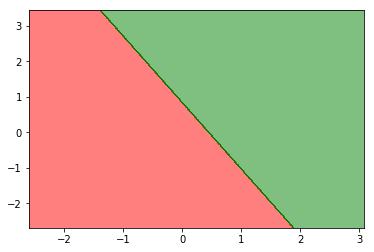

In [48]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()] ).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

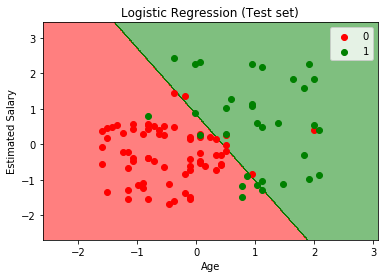

In [49]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()] ).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1],
                c = ListedColormap(('red','green'))(i),label =j  )
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()